In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import hdbscan
from sklearn.datasets import make_blobs
from deepART import dataset

/usr/local/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
np.random.seed(0)
cluster_1 = np.random.uniform(low=0, high=0.65, size=(100, 2))
cluster_2 = np.random.uniform(low=0.35, high=1, size=(100, 2))
x = np.vstack((cluster_1, cluster_2))
y = np.array(([0] * 100) + ([1] * 100))
sample_data = dataset.Dataset(x)

<IPython.core.display.Javascript object>


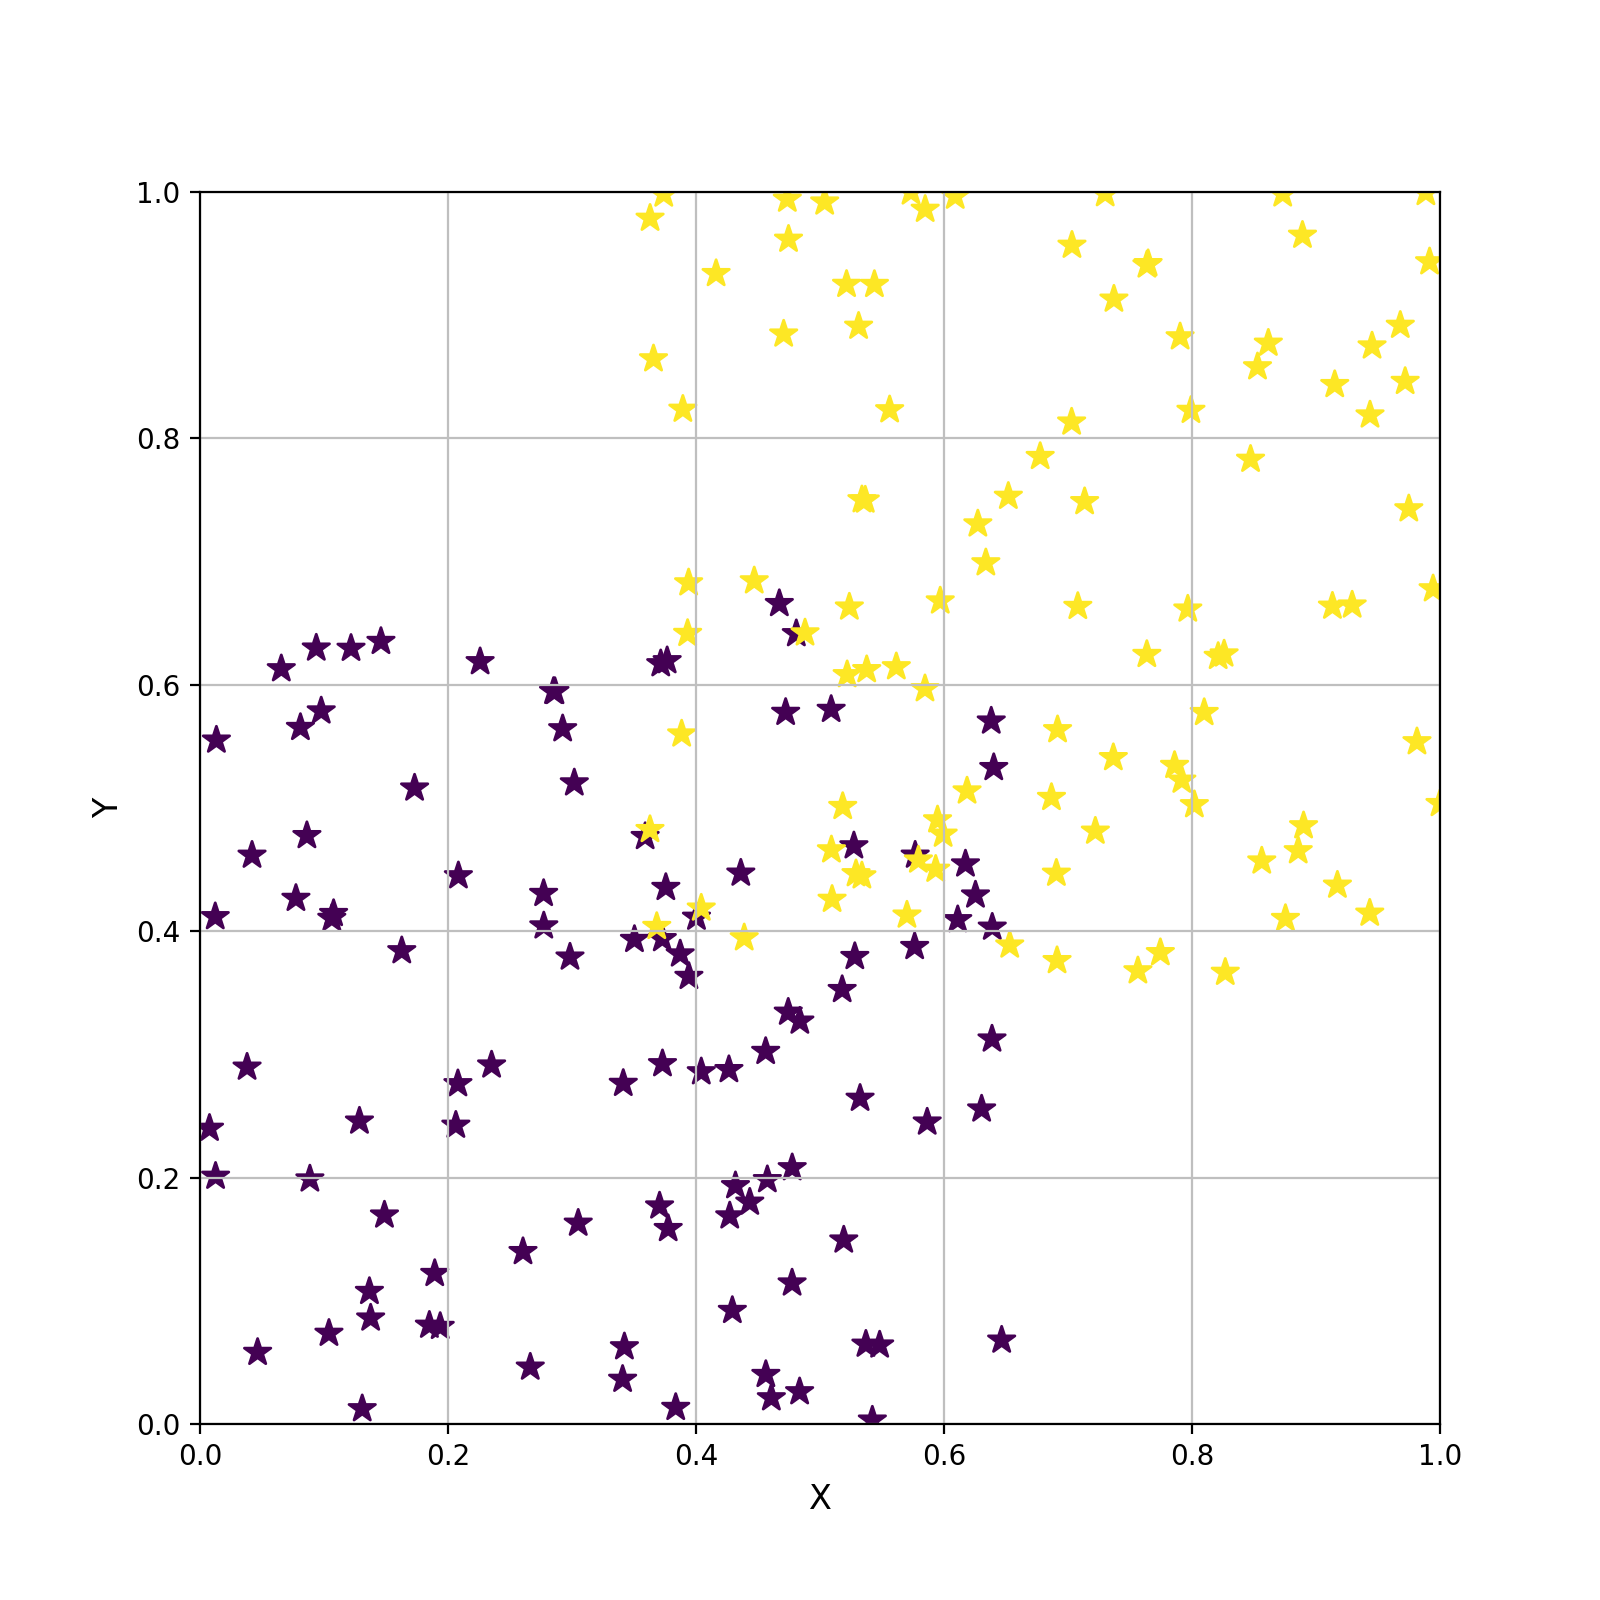

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
# scatter with colormap mapping
ax.scatter(sample_data.data_normalized[...,0],sample_data.data_normalized[...,1],s=100,c=y,marker='*')
ax.axis((0, 1, 0, 1))
plt.show()
#fig.savefig('data_raw.png', bbox_inches='tight')

In [4]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=44, leaf_size=2, algorithm="boruvka_balltree", min_samples=None, alpha=0.543326, prediction_data=True, cluster_selection_epsilon=0.0, metric="manhattan").fit(sample_data.data_normalized)


In [5]:
clusterer.labels_

array([ 0,  0,  0,  0,  1,  0,  0, -1, -1,  0,  1, -1,  0, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0, -1,  0,
        0,  1,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  1,  0, -1,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  1, -1,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1,  1,  0,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,
        0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  0,  0])

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [7]:
pred_labels = clusterer.labels_

In [8]:
pred_labels

array([ 0,  0,  0,  0,  1,  0,  0, -1, -1,  0,  1, -1,  0, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0, -1,  0,
        0,  1,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  1,  0, -1,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  1, -1,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1,  1,  0,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,
        0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  0,  0])

In [9]:
clusterer.probabilities_

array([1.        , 1.        , 1.        , 0.92248776, 1.        ,
       1.        , 0.9819736 , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.7710226 , 0.        , 1.        ,
       0.81070853, 0.98163289, 0.        , 1.        , 1.        ,
       0.53021274, 0.71248338, 1.        , 0.66007635, 0.        ,
       0.70863848, 0.66082373, 0.        , 0.99293829, 0.        ,
       0.61463841, 0.83150765, 0.        , 0.71779128, 0.62771726,
       1.        , 1.        , 0.62771726, 0.70938364, 0.70856581,
       0.        , 0.68730559, 1.        , 0.80812351, 0.9819736 ,
       0.91245955, 0.73637022, 0.        , 0.        , 0.54896724,
       0.64317572, 1.        , 0.91247802, 1.        , 0.        ,
       0.94350186, 0.98990634, 1.        , 1.        , 1.        ,
       1.        , 0.89838796, 1.        , 0.        , 0.64578801,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       0.99017337, 0.92548424, 1.        , 0.        , 0.96457

In [10]:
def unpack_results(pred,target,target_scores):
    #unpack result tuples
    pred_k = []
    scores = []
    data_contour = np.empty((0,2),dtype=np.float32)
    for n, results in enumerate(pred):
        if results == target:
            data_contour = np.vstack((data_contour, sample_data.data_normalized[n]))
            scores.append(target_scores[n])
    return data_contour, scores

def plot_countour(fig,data_contour, scores, sub_index, nplots=(3,2)):
    ax = fig.add_subplot(nplots[0],nplots[1],sub_index)

    ax.set_title("Clustering Results ",fontsize=14)
    ax.set_xlabel("X",fontsize=12)
    ax.set_ylabel("Y",fontsize=12)
    ax.grid(True,linestyle='-',color='0.75')
    # scatter with colormap mapping to predicted class
    ax.tricontour(data_contour[...,0], data_contour[...,1], scores, 14, linewidths=0, colors='k')
    cntr2 = ax.tricontourf(data_contour[...,0], data_contour[...,1], scores, 14, cmap="RdBu_r",)

    fig.colorbar(cntr2, ax=ax)
    ax.plot(data_contour[...,0], data_contour[...,1], 'ko', ms=0.5)
    ax.axis((0, 1, 0, 1))
    ax.set_title('Cluster {}'.format(int(sub_index-1)))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    #fig.savefig('data_clustered.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


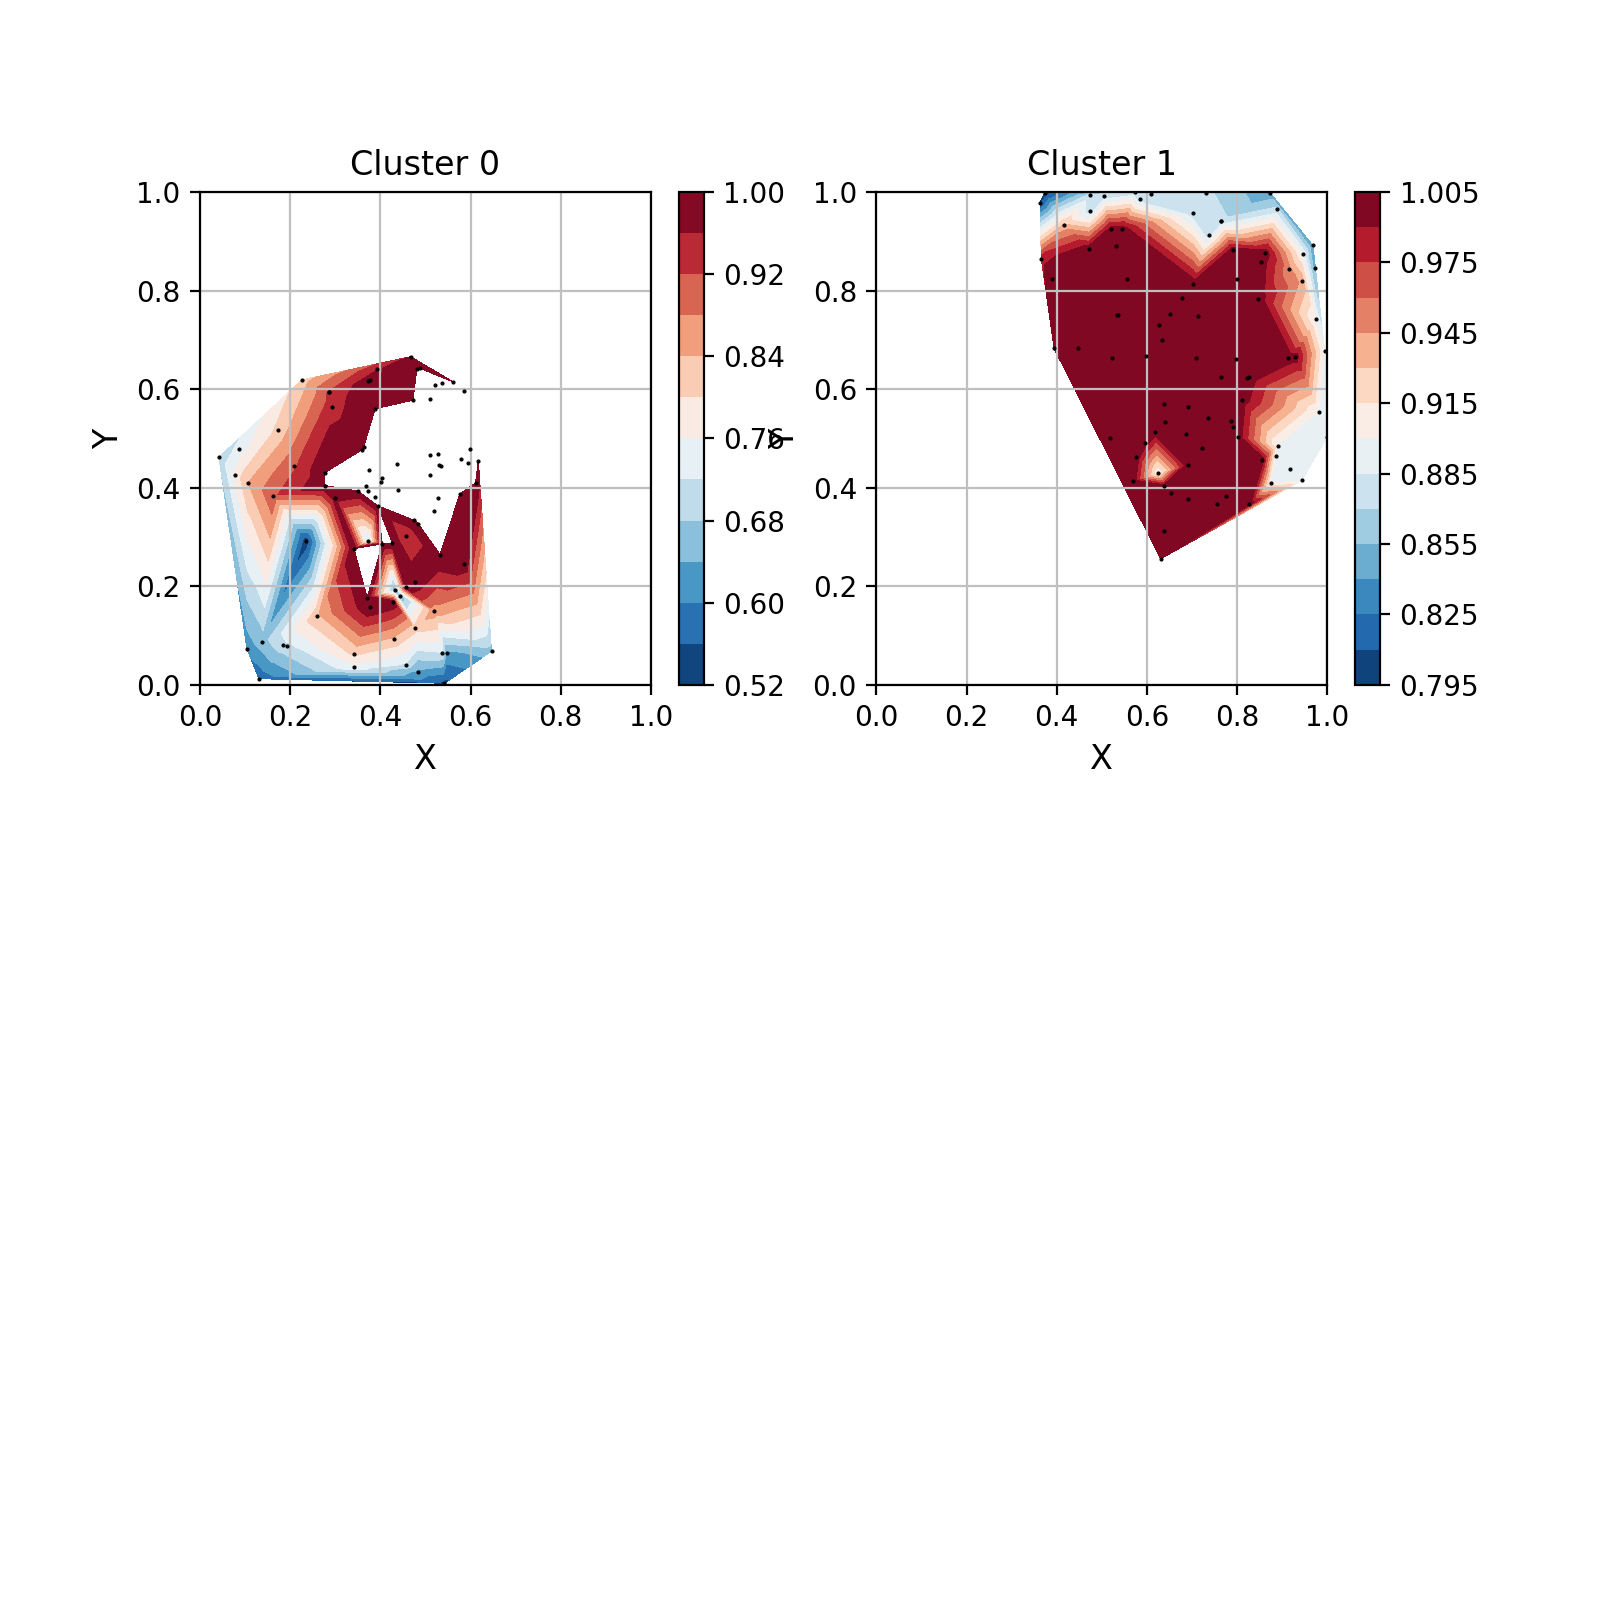

In [11]:
#plot out clusters memebership
fig = plt.figure(figsize=(8,8))
nplots = (int(np.ceil(len(set(pred_labels))/2)), 2)
for i in range(2):
    data_contour, scores = unpack_results(pred_labels,target=i, target_scores=clusterer.probabilities_)
    plot_countour(fig, data_contour,scores, sub_index=i+1,nplots=nplots)
# plt.savefig("hdbscan_contour_2.png")

In [12]:
pred = pred_labels[pred_labels!=-1]
norm_1 = sample_data.data_normalized[...,0][pred_labels!=-1]
norm_2 = sample_data.data_normalized[...,1][pred_labels!=-1]

<IPython.core.display.Javascript object>


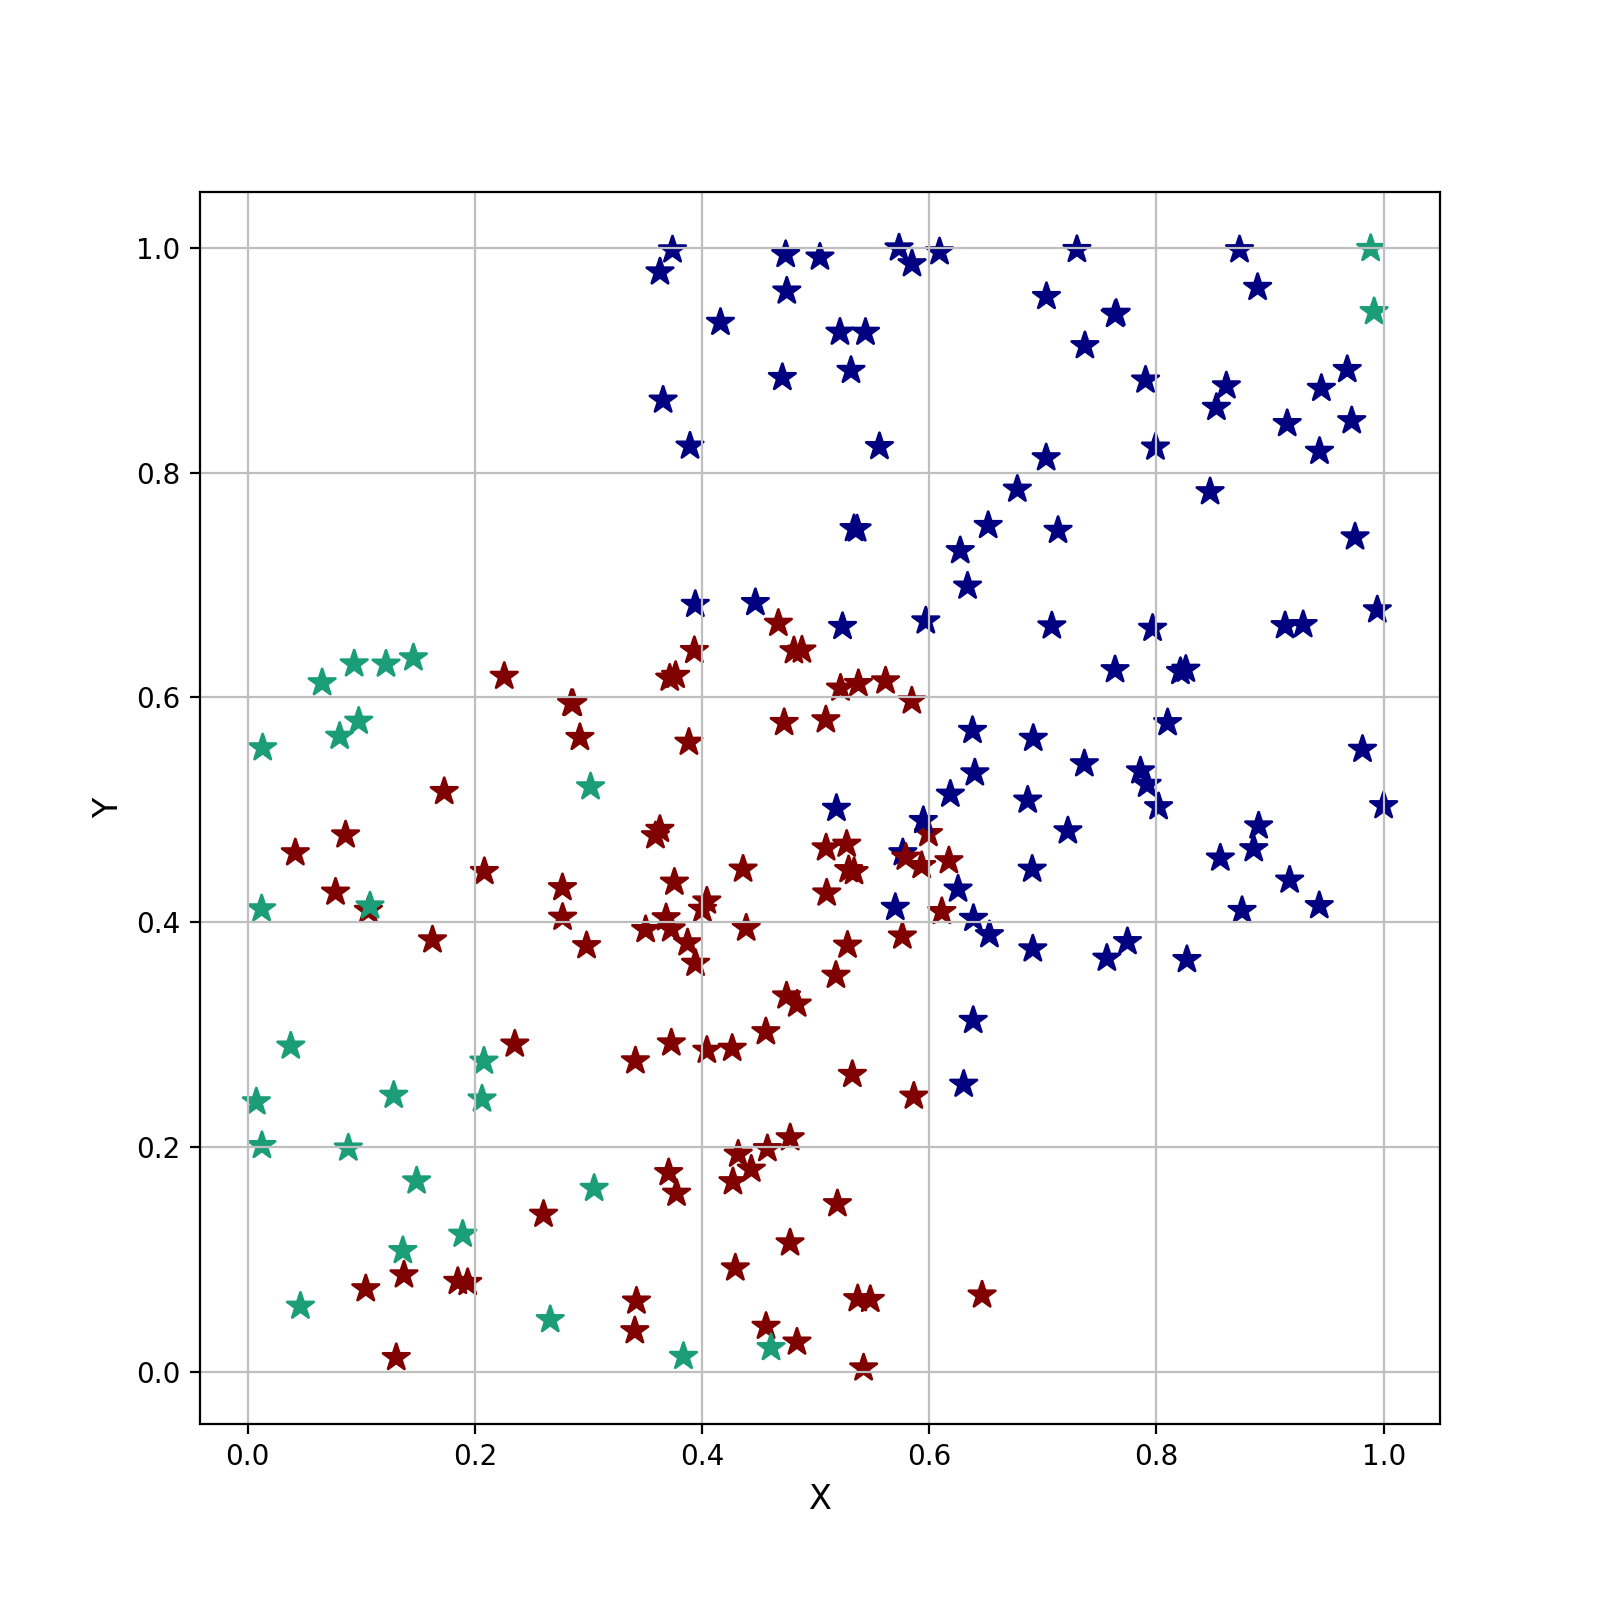

In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.set_title(" ",fontsize=14)
ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
# ax.set_ylabel("Z",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
# scatter with colormap mapping to predicted class
# ax.scatter(sample_data.data_normalized[...,0],sample_data.data_normalized[...,1],s=100,c=pred_labels, marker = '*', cmap = cm.jet_r );

ax.scatter(norm_1,norm_2,s=100,c=pred, marker = '*', cmap = cm.jet_r )
ax.scatter(sample_data.data_normalized[...,0][pred_labels==-1], sample_data.data_normalized[...,1][pred_labels==-1],
          c=pred_labels[pred_labels==-1], marker = '*', s=100, cmap="Dark2")

plt.show()
# plt.savefig("hdbscan_correct_2.png")

In [14]:
clusterer.labels_

array([ 0,  0,  0,  0,  1,  0,  0, -1, -1,  0,  1, -1,  0, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0, -1,  0,
        0,  1,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  1,  0, -1,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  1, -1,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1,  1,  0,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,
        0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  0,  0])

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [16]:
pred_labels = []
for true, pred in zip(y, clusterer.labels_):
    if pred == -1:
        pred = int(not true)
    pred_labels.append(pred)
pred_labels

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0]

In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, precision_score, recall_score, f1_score, accuracy_score, normalized_mutual_info_score

def obtain_metrics(x, y_true, y_pred):
    results = dict({})
    results["silhouette_score"] = silhouette_score(x, y_pred)
    results["davies_bouldin_score"] = davies_bouldin_score(x, y_pred)
    results["normalized_mutual_info_score"] = normalized_mutual_info_score(y_true, y_pred)
    results["precision_score"] = precision_score(y_true, y_pred)
    results["recall_score"] = recall_score(y_true, y_pred)
    results["f1_score"] = f1_score(y_true, y_pred)
    results["accuracy_score"] = accuracy_score(y_true, y_pred)
    return results

In [18]:
obtain_metrics(sample_data.data_normalized, y, pred_labels)

{'silhouette_score': 0.17202069,
 'davies_bouldin_score': 1.987127744742096,
 'normalized_mutual_info_score': 0.17735610324672482,
 'precision_score': 0.7142857142857143,
 'recall_score': 0.8,
 'f1_score': 0.7547169811320756,
 'accuracy_score': 0.74}